In [7]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Loading the saved data

correlation_matrix = pd.read_csv('correlation_matrix_.csv')

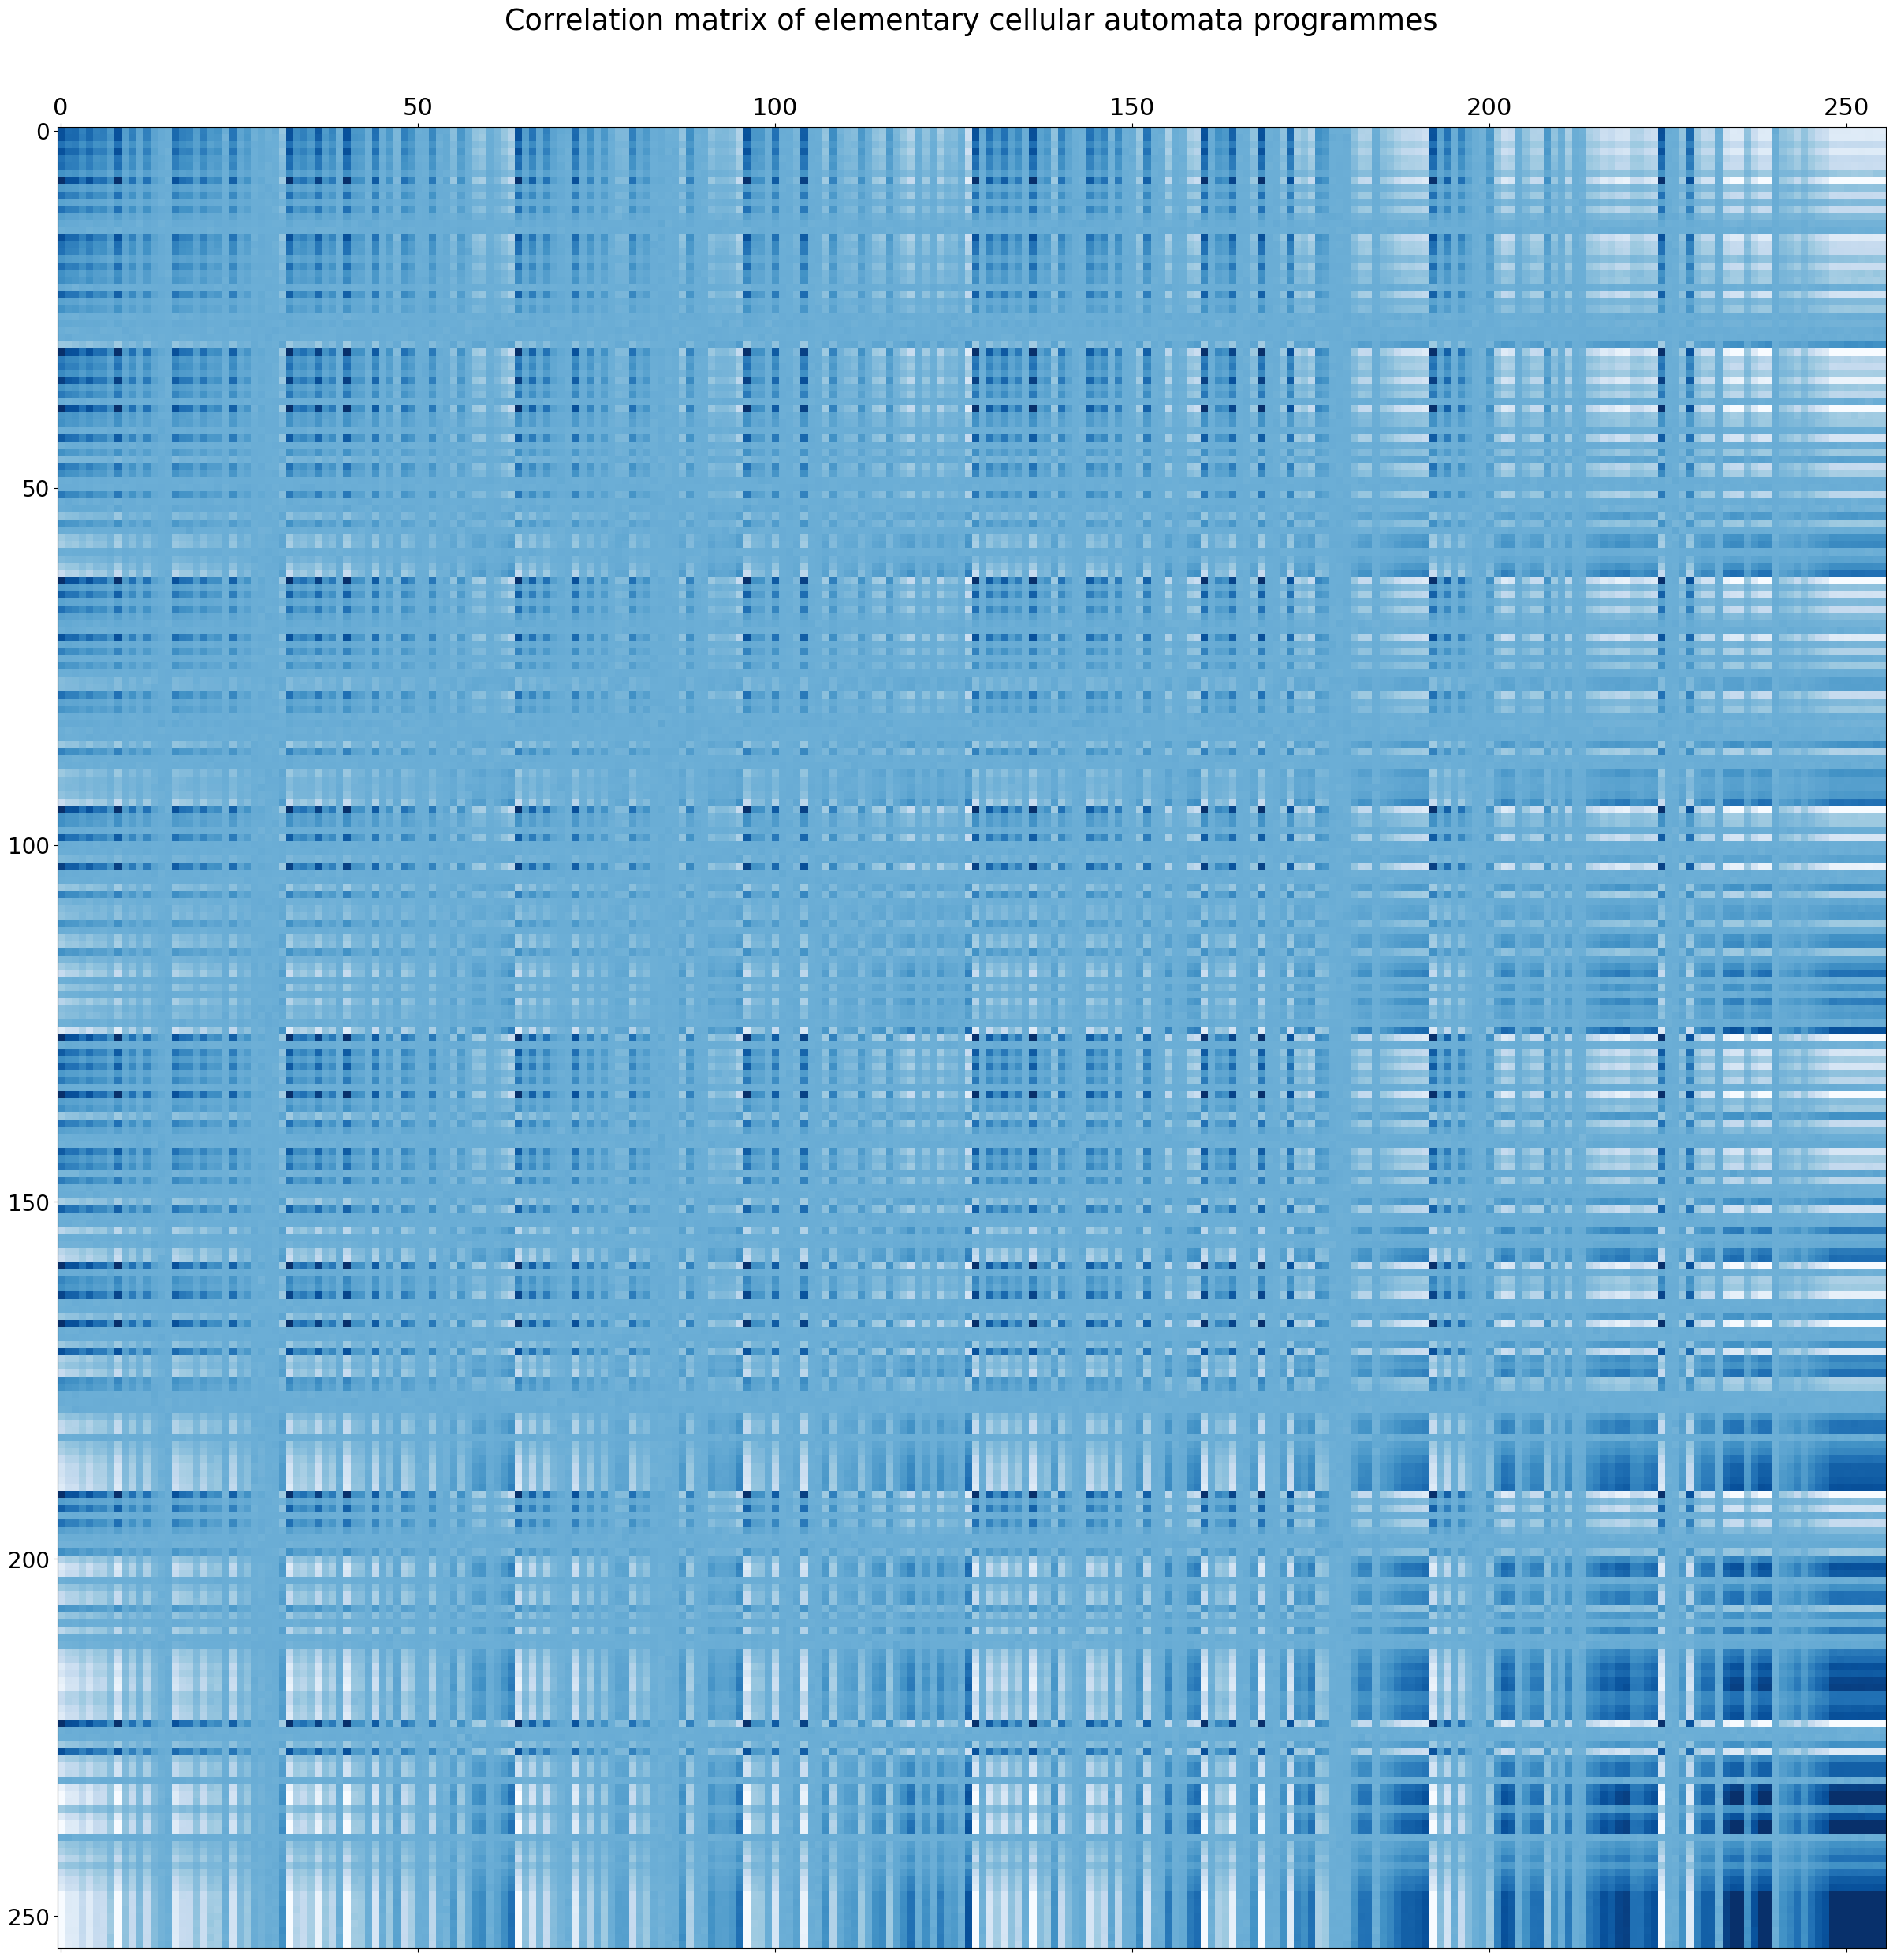

In [17]:
# Creating the figure itself.

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams.update({'font.size': 22})
plt.title('Correlation matrix of elementary cellular automata programmes', y=0.98)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.matshow(correlation_matrix, cmap=plt.cm.Blues)

In [ ]:
# The code which was used to create and save the data being loaded above.

def find_corr_3(sample_number, data_size, timesteps): #here, sample number refers to the number of samples per pair

    correlation_matrix = np.zeros((256,256))
    # specifies the first rule number, i
    for i in tqdm(range(256)):
        # specifies the second rule number, j, which is geq i
        for j in range(i, 256):
            # specifies the point in the loop regarding sample number
            for k in range(sample_number):
                # will be written to with the two last rows
                last_row = []
                cellular_automaton = cpl.init_random(data_size)
                cellular_automaton = cpl.evolve(cellular_automaton, timesteps=timesteps, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, i))
                last_row.append(cellular_automaton[-1])
                cellular_automaton = cpl.init_random(data_size)
                cellular_automaton = cpl.evolve(cellular_automaton, timesteps=timesteps, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, j))
                last_row.append(cellular_automaton[-1])
                # calculate the correlation between these two last rows
                corr = sum(x == y for x, y in zip(last_row[0], last_row[1]))
                # adding this value to the array
                correlation_matrix[i][j] += corr
            #finding the average correlation values, because otherwise this is only being added to
            correlation_matrix[i][j] = correlation_matrix[i][j] / sample_number
            # because the matrix should be diagonal given the abelian nature of the variables
            correlation_matrix[j][i] = correlation_matrix[i][j]
            #print(correlation_matrix[i][j])

    return correlation_matrix

correlation_matrix = find_corr_3(sample_number=100, data_size=100, timesteps=100)

In [ ]:
# Used for calculing autocorrelation scores for programmes

programme_list = np.arange(0, 256, 1)

print([x for _, x in sorted(zip(np.diagonal(correlation_matrix), programme_list))]) # NOTE: This gives lowest autocorrelation first

In [ ]:
# Uses hierarchical clustering to give me an ordering of the data

from scipy.cluster.hierarchy import linkage, dendrogram

programme_list = np.arange(0, 256, 1)

#linkage_matrix = linkage(correlation_matrix, method='average', metric='euclidean')
linkage_matrix = linkage(correlation_matrix, method='average', metric='seuclidean')

#dendrogram(linkage_matrix) #Plots the dendrogram
#order = np.argsort(linkage_matrix[:, 2])

dendrogram_info = dendrogram(linkage_matrix, no_plot=True)

# Retrieve the order of sets of data
order = dendrogram_info['leaves']

#print("Ordered sets of data:")
ordered_prog_list = []
for i in order:
    #print(f"Programme {programme_list[i]}")
    ordered_prog_list.append(programme_list[i])

print(f"Ordered list of programmes using Hierarchical clustering :", ordered_prog_list)